# SEP on JWST NIRCam Image: NGC 3324 (F090W)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import sep
from matplotlib.patches import Ellipse

## Load and Prepare the JWST FITS Image

In [2]:
# Load the JWST NIRCam image (make sure this file is in your working directory)
filename = 'jw02731-o001_t017_nircam_clear-f090w_i2d.fits'
hdul = fits.open(filename)

# JWST I2D science image is usually in extension 1
data = hdul[1].data

In [3]:
new_data = data.astype(data.dtype.newbyteorder("="))
new_data = data.byteswap()
new_data = new_data.view(new_data.dtype.newbyteorder("="))
data = data.byteswap()
data = data.view(data.dtype.newbyteorder("="))

## Background Subtraction

In [4]:
bkg = sep.Background(data)
data_sub = data - bkg.back()

## Source Detection

In [5]:
objects = sep.extract(data_sub, 1.5)
print(f"Number of sources detected: {len(objects)}")

Number of sources detected: 8879


## Visualize Detected Sources

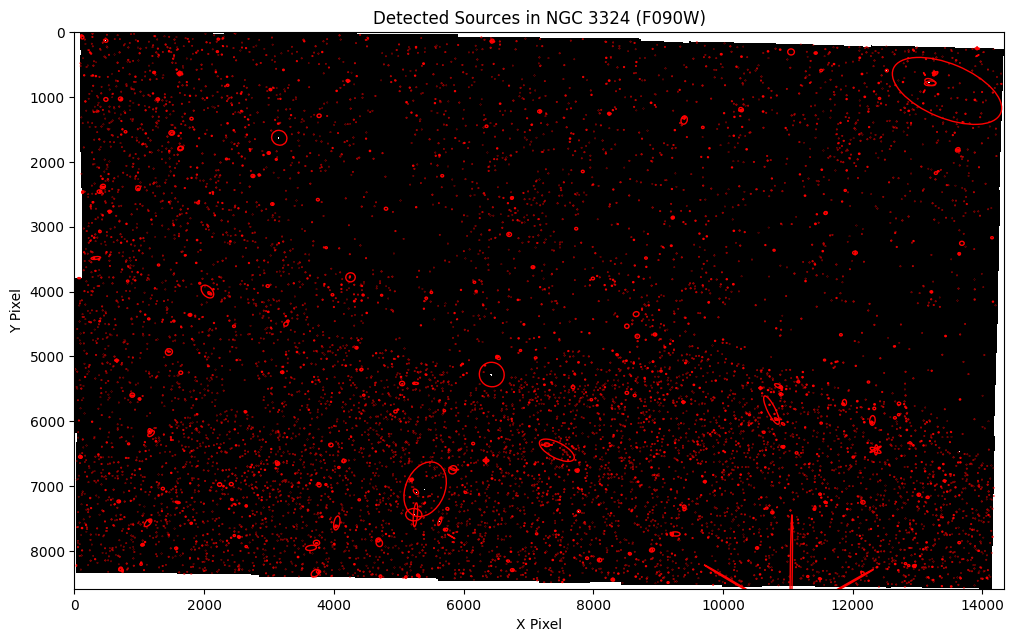

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray', vmin=m - s, vmax=m + s)

for obj in objects:
    e = Ellipse(xy=(obj['x'], obj['y']),
                width=6*obj['a'],
                height=6*obj['b'],
                angle=obj['theta'] * 180. / np.pi,
                edgecolor='red', facecolor='none')
    ax.add_patch(e)

ax.set_title("Detected Sources in NGC 3324 (F090W)")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.savefig("jwst_ngc3324_detected_sources.png", dpi=150)
plt.show()

## Histogram of Source Fluxes

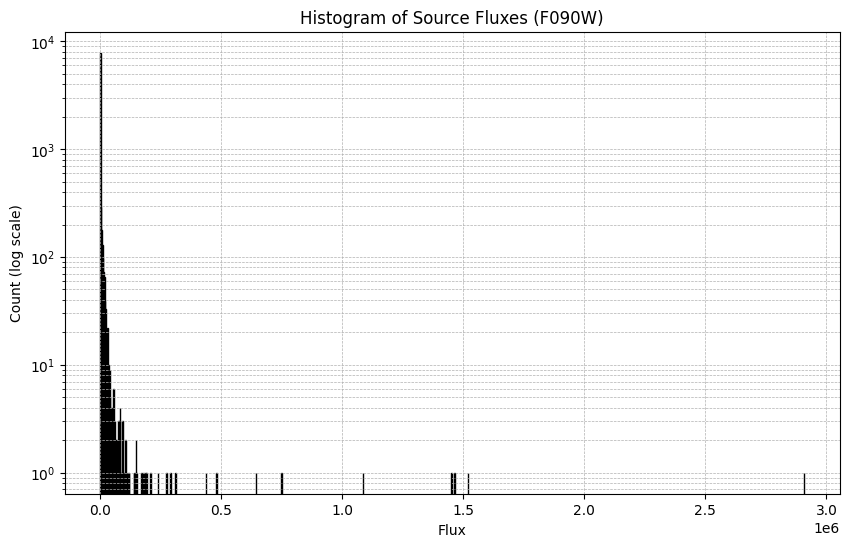

In [7]:
fluxes = np.array([obj['flux'] for obj in objects])

plt.figure(figsize=(10, 6))
plt.hist(fluxes, bins=1000, log=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Source Fluxes (F090W)")
plt.xlabel("Flux")
plt.ylabel("Count (log scale)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.savefig("jwst_ngc3324_flux_histogram.png", dpi=150)
plt.show()

In [8]:
# Statistics
mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes)
std_flux = np.std(fluxes)

# Outlier analysis
max_flux = np.max(fluxes)
max_index = np.argmax(fluxes)
max_obj = objects[max_index]
outlier_coords = (max_obj['x'], max_obj['y'])
num_std_devs = (max_flux - mean_flux) / std_flux

print(f"Mean Flux: {mean_flux}")
print(f"Median Flux: {median_flux}")
print(f"Standard Deviation: {std_flux}")
print(f"Largest Flux: {max_flux}")
print(f"Largest Outlier Coordinates: {outlier_coords}")
print(f"Standard Deviations from Mean: {num_std_devs:.2f}")

Mean Flux: 3515.3095577415925
Median Flux: 121.22374725341797
Standard Deviation: 45757.92872487852
Largest Flux: 2908919.25
Largest Outlier Coordinates: (np.float64(6434.358532401312), np.float64(5279.120542297953))
Standard Deviations from Mean: 63.50
